# Comparison between the output and labels

In [4]:
from glob import glob
import os
import nibabel as nib
import matplotlib.pyplot as plt

dataset_dir = f'./output'
names = sorted(glob(f"{dataset_dir}/**"))
name = names[0]
folder_name = os.path.basename(name)
print(folder_name)

1.2.840.113619.6.95.31.0.3.4.1.3096.13.97784


In [9]:
def plot_slices(dir, title=None):
	data = nib.load(dir).get_fdata()
	print(f"Data shape: {data.shape}")
	n_slices = data.shape[0]
	n_rows = int(n_slices / 4)
	fig, axes = plt.subplots(nrows=n_rows, ncols=4, figsize=(20, 20))
	plt.axis('off')
	for i, ax in enumerate(axes.flatten()):
		if i < n_slices:
			ax.imshow(data[i, :, :], cmap='gray')
			ax.set_title(f'Slice {i}')
		else:
			ax.axis('off')
	if title:
		fig.suptitle(title, fontsize=16)
	plt.show()

*Label*

Data shape: (32, 512, 512)


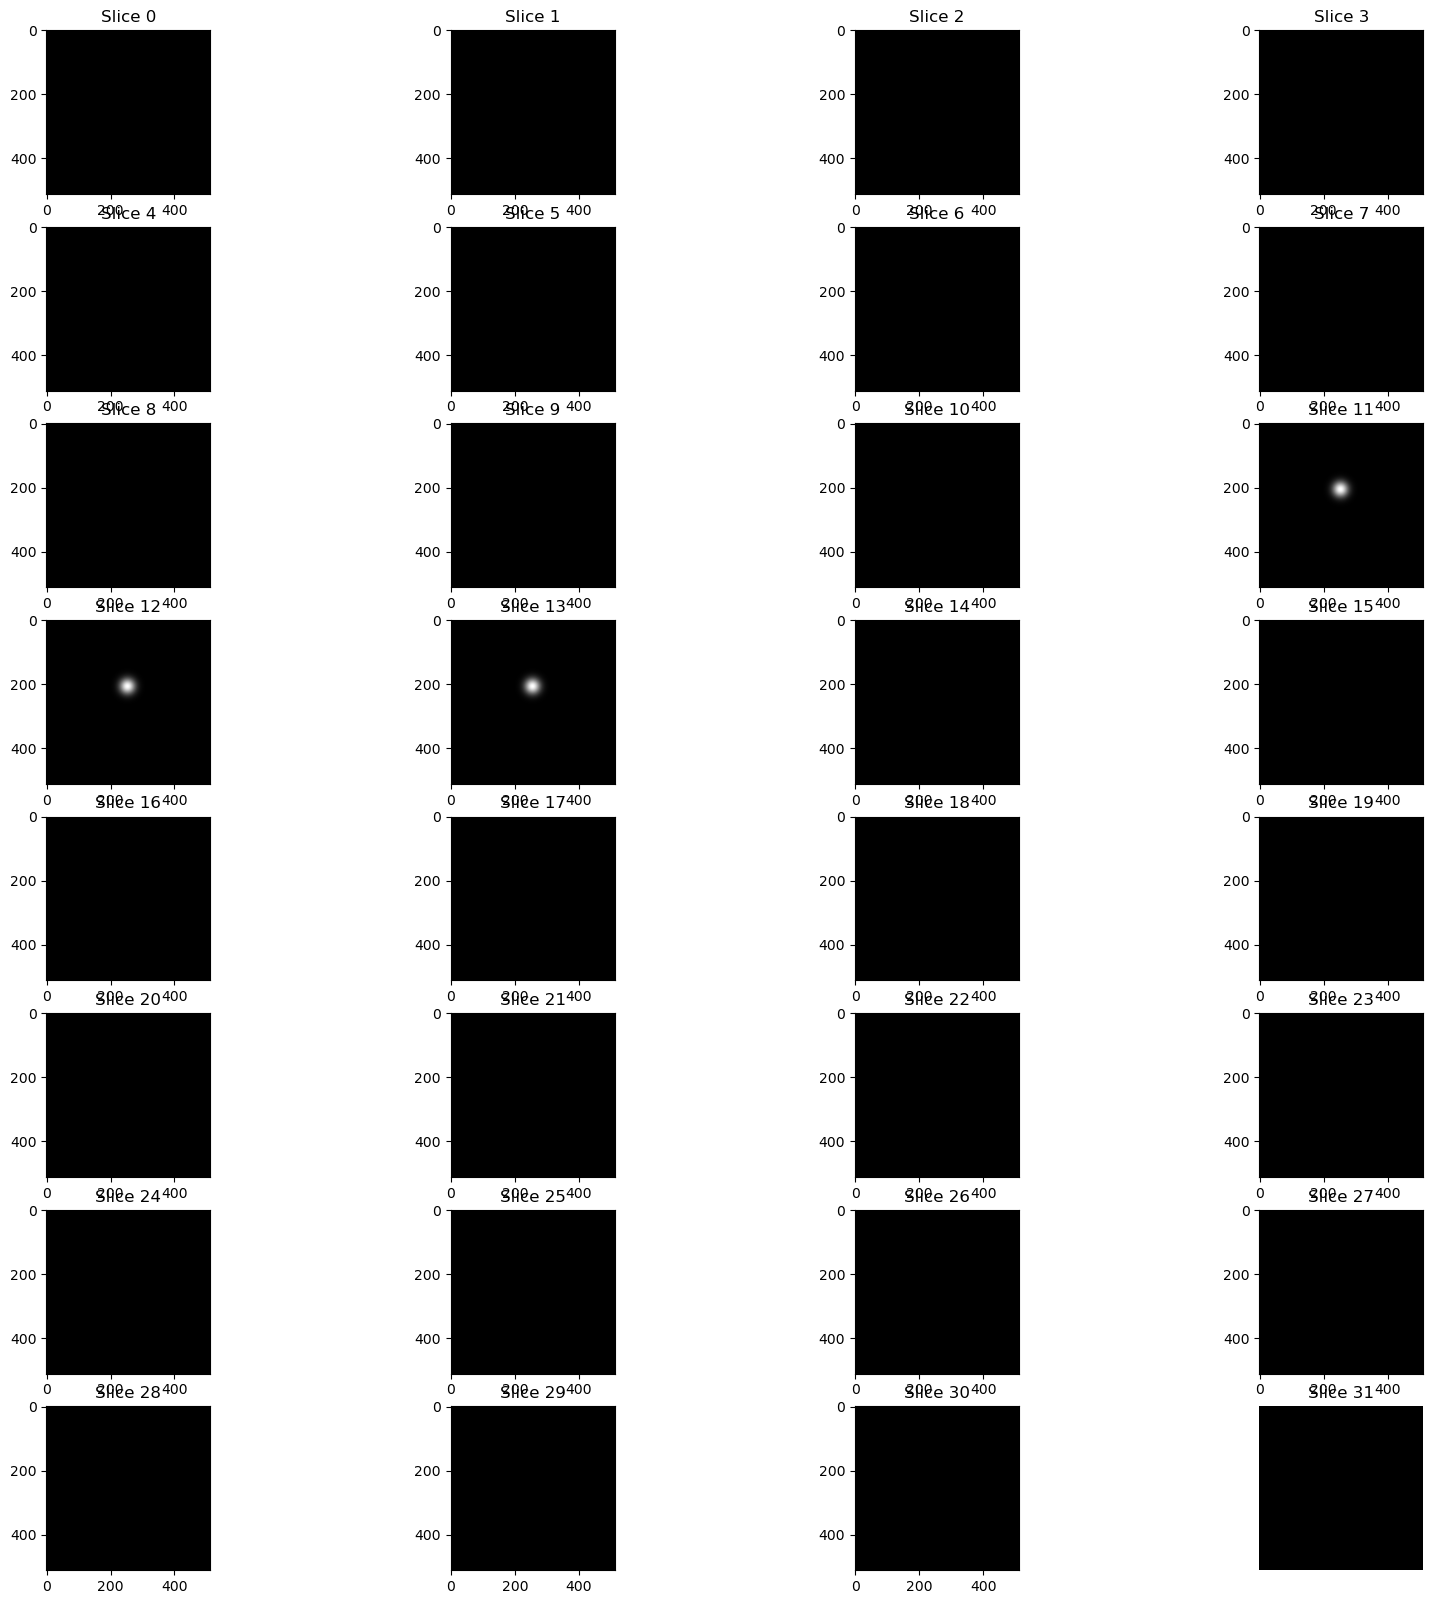

In [10]:
plane = "sagittal"
plot_slices(f"./labels/{folder_name}/{plane}_output.nii")

*Output*

Data shape: (32, 512, 512)


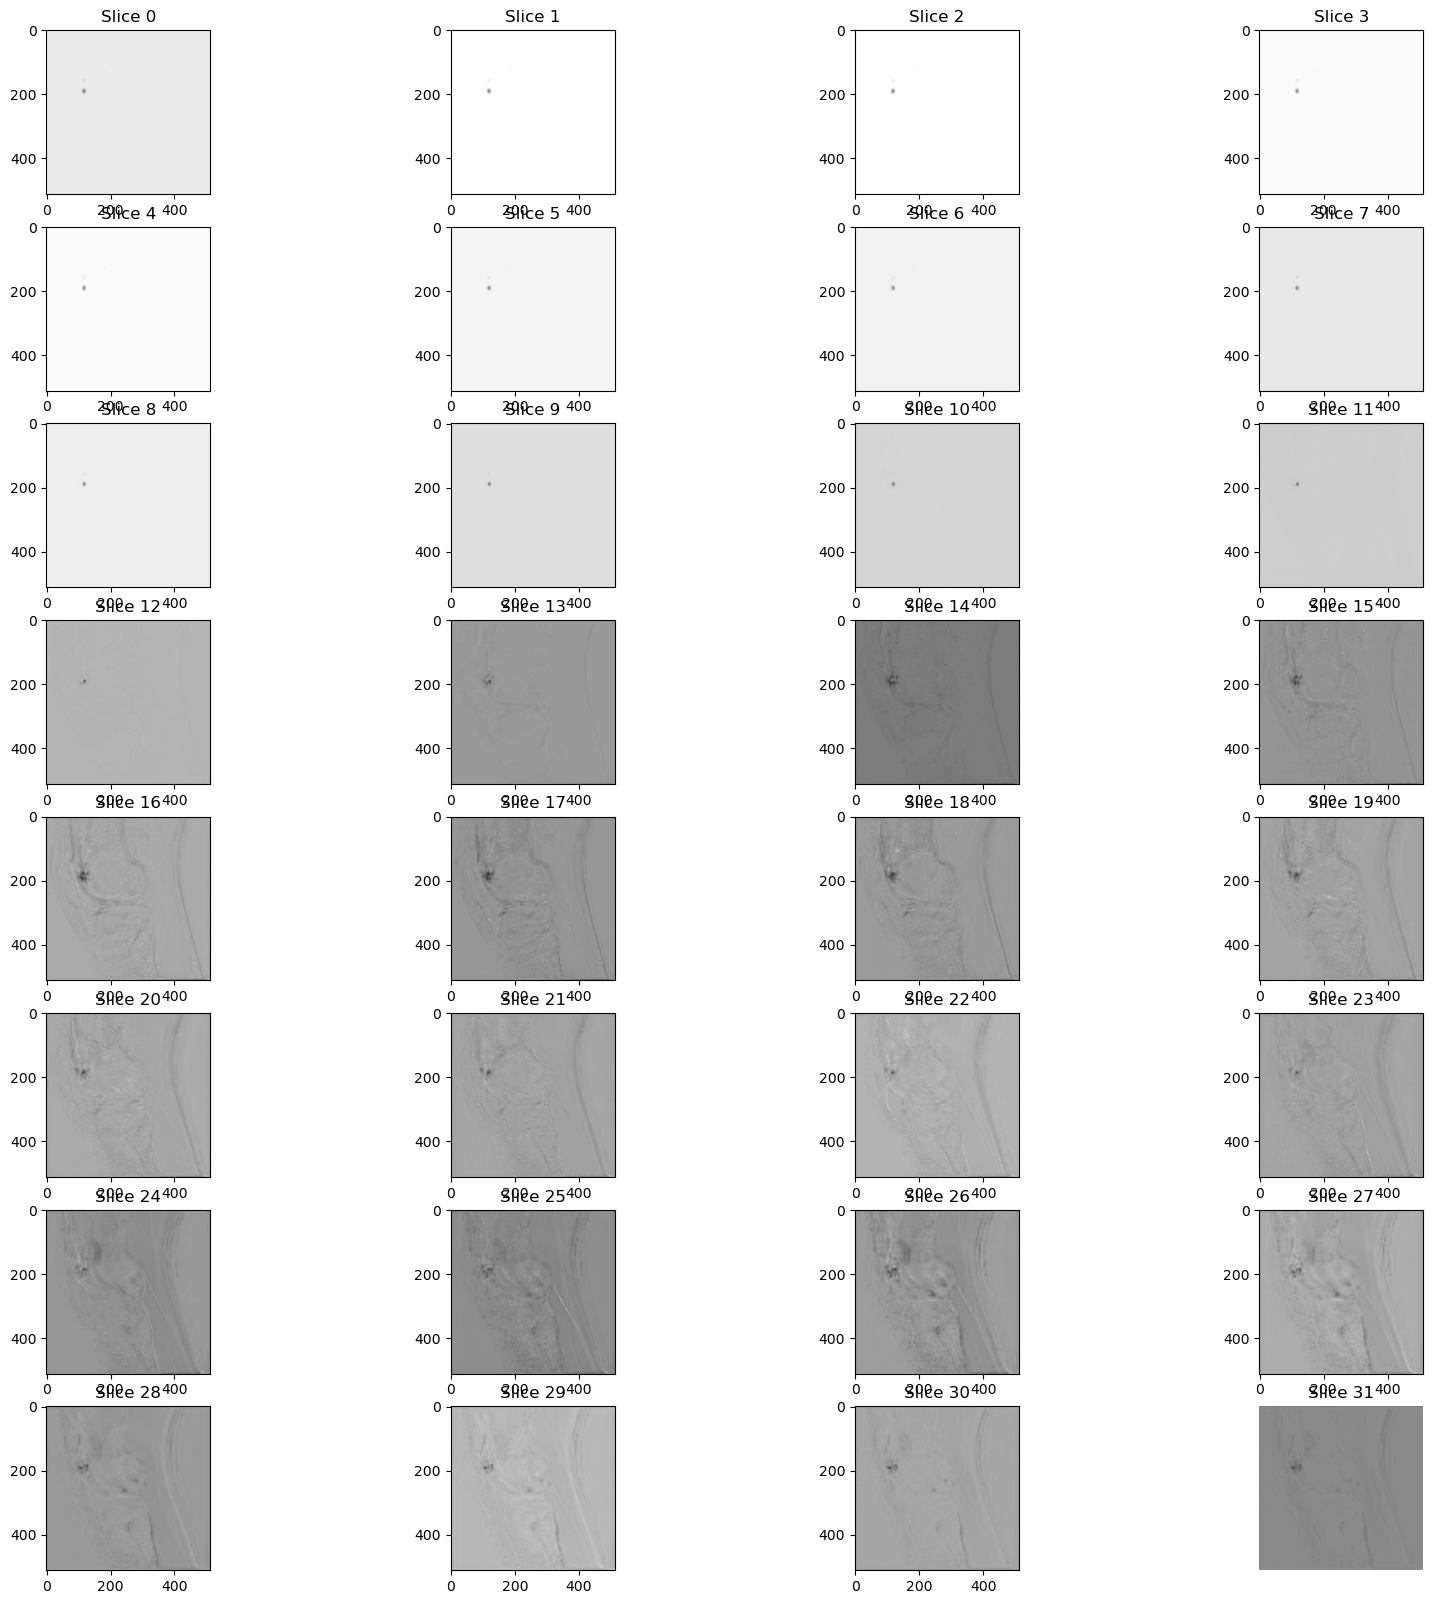

In [11]:
plot_slices(f"./output/{folder_name}/{plane}_output.nii")


*Original data*

Data shape: (512, 512, 25)


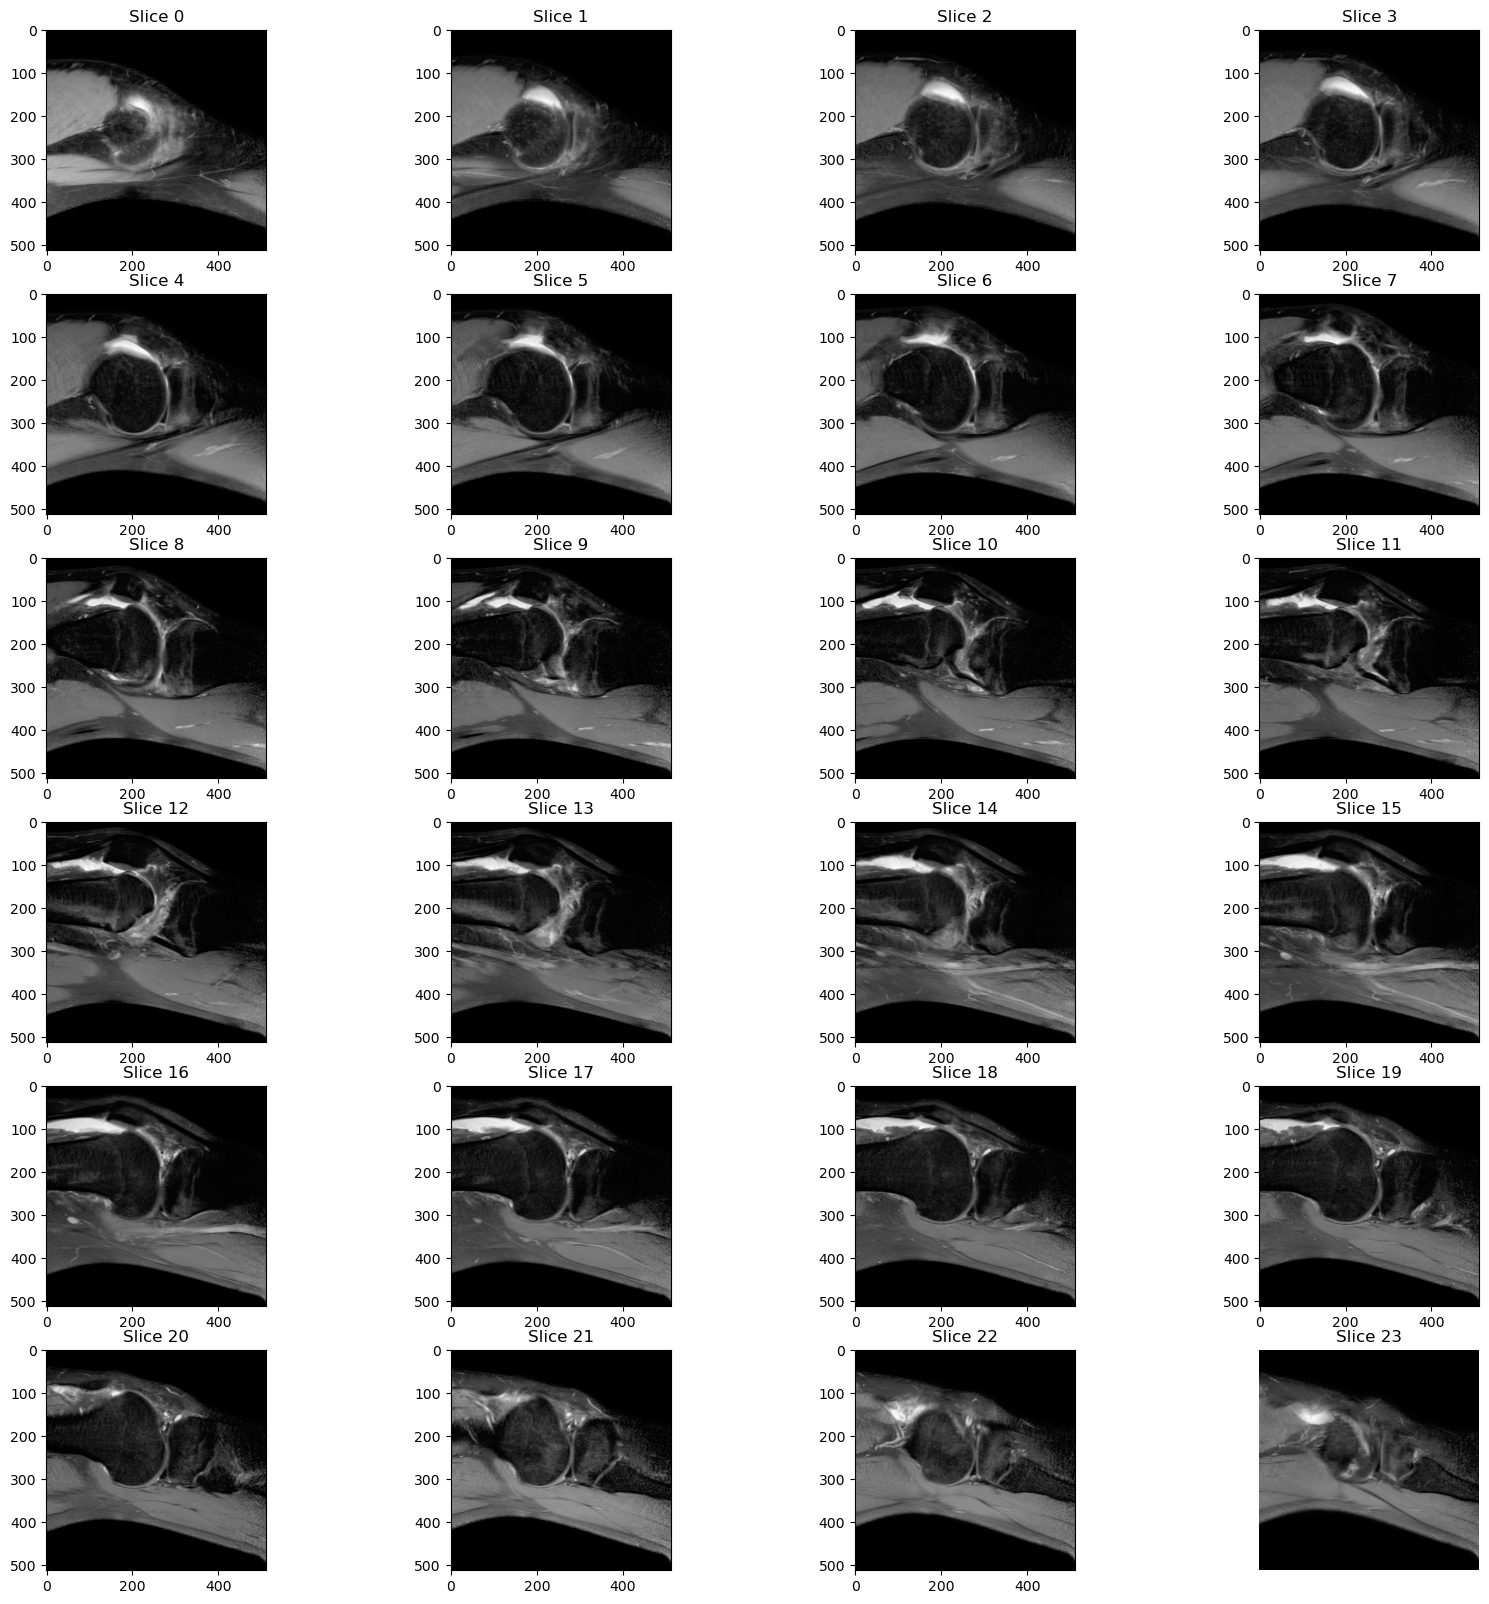

In [14]:
def dataset(dir, title=None):
	data = nib.load(dir).get_fdata()
	print(f"Data shape: {data.shape}")
	n_slices = data.shape[2]
	n_rows = int(n_slices / 4)
	fig, axes = plt.subplots(nrows=n_rows, ncols=4, figsize=(20, 20))
	plt.axis('off')
	for i, ax in enumerate(axes.flatten()):
		if i < n_slices:
			ax.imshow(data[:, :, i], cmap='gray')
			ax.set_title(f'Slice {i}')
		else:
			ax.axis('off')
	if title:
		fig.suptitle(title, fontsize=16)
	plt.show()

dataset(f"./example/{folder_name}/{plane.upper()}_PROTON.nii")